In [1]:
# In this exercise, we want to find out skill trend of top 5 most demanding skills for the requested job profession(s)
# having their likelihood of being requested in the job postings as y axis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df = df.drop_duplicates().copy()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

<class 'pandas.core.frame.DataFrame'>
Index: 785640 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785640 non-null  object        
 1   job_title              785639 non-null  object        
 2   job_location           784595 non-null  object        
 3   job_via                785632 non-null  object        
 4   job_schedule_type      772975 non-null  object        
 5   job_work_from_home     785640 non-null  bool          
 6   search_location        785640 non-null  object        
 7   job_posted_date        785640 non-null  datetime64[ns]
 8   job_no_degree_mention  785640 non-null  bool          
 9   job_health_insurance   785640 non-null  bool          
 10  job_country            785591 non-null  object        
 11  salary_rate            33066 non-null   object        
 12  salary_year_avg        22002 non-null   float64  

In [ ]:
# These are the job professions for which you can generate query.

In [9]:
df.job_title_short.unique()

array(['Data Analyst', 'Data Engineer', 'Senior Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [ ]:
# INPUT :

In [ ]:
lst = ['Data Analyst', 'Data Engineer', 'Business Analyst', 'Data Scientist']

In [ ]:
# OUTPUT :

In [ ]:
df_og = df.copy()

df.dropna(subset = ['job_title_short', 'job_skills', 'job_posted_date'], inplace = True)

df['job_posted_month_no'] = df.job_posted_date.dt.month

df_clean = df.copy()

import ast
df['job_skills'] = df.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df_ex = df.explode("job_skills")

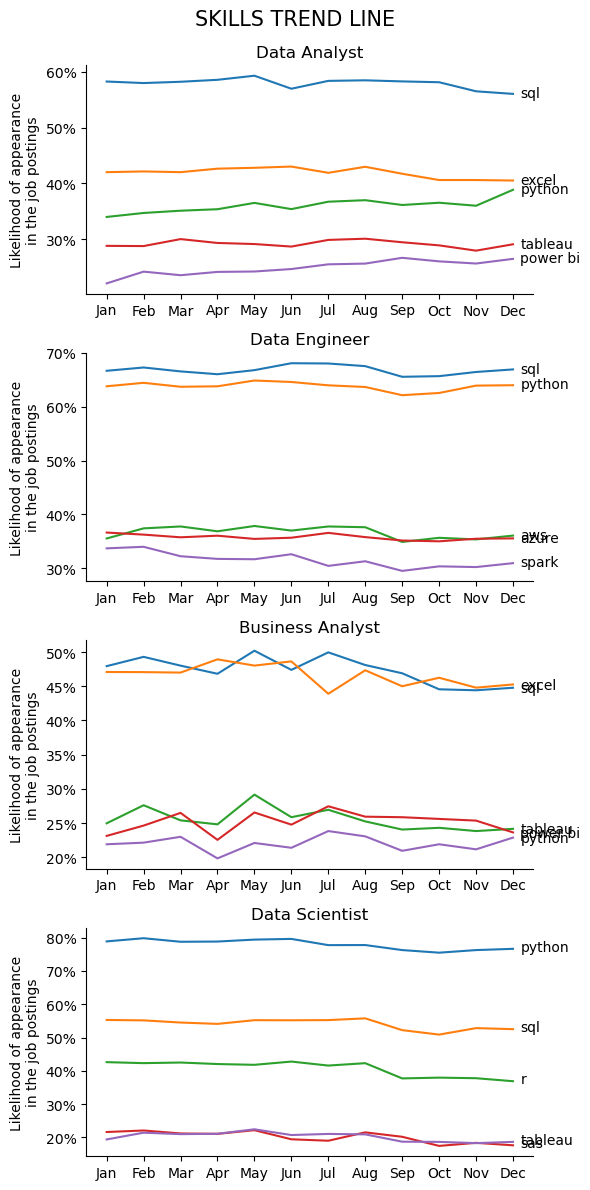

In [ ]:
fig, ax = plt.subplots(len(lst),1, figsize = (6, 3*len(lst)))

for i,job in enumerate(lst) :
    dfi = df_ex.copy()
    df_cln = df_clean.copy()

    dfi = dfi[dfi['job_title_short'] == job]
    df_cln = df_cln[df_cln['job_title_short'] == job]

    df_pivot = dfi.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = "size", fill_value = 0)
    df_pivot.loc['Total'] = df_pivot.sum()
    df_pivot.sort_values('Total', inplace = True, ascending = False, axis = 1)
    df_pivot.drop(labels = 'Total', inplace = True)

    df_plt = df_pivot.iloc[: , :5]

    df_plt2 = df_cln.groupby(by = "job_posted_month_no").agg(demand = ("job_posted_month_no", "size"))
    df_plt = df_plt.div(df_plt2.values/100, axis = 0)
    df_plt.reset_index(inplace = True)
    df_plt['job_posted_month'] = pd.to_datetime(df_plt.job_posted_month_no, format = "%m").dt.strftime("%b")
    df_plt.drop('job_posted_month_no', inplace = True, axis = 1)
    df_plt.set_index('job_posted_month', inplace = True)

    sns.lineplot(data = df_plt, dashes = False, palette = 'tab10', ax = ax[i])
    sns.despine()
    ax[i].legend().remove()
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Likelihood of appearance\nin the job postings")
    ax[i].set_title(job)

    from matplotlib.ticker import PercentFormatter
    ax[i].yaxis.set_major_formatter(PercentFormatter(decimals = 0))

    for j in range(len(df_plt.columns)) :
        ax[i].text(y = (df_plt.iloc[-1, j] - 0.6), x = (df_plt.index.size - 1 + 0.2), s = df_plt.columns[j])

fig.suptitle("SKILLS TREND LINES", fontsize = 15, ha = "center", va = 'center')
fig.tight_layout()